# Exercice RANDU

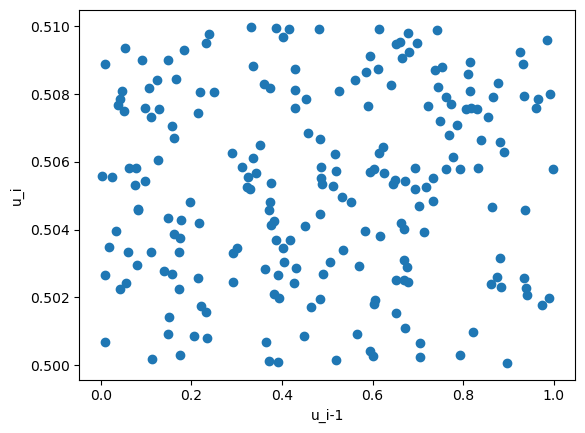

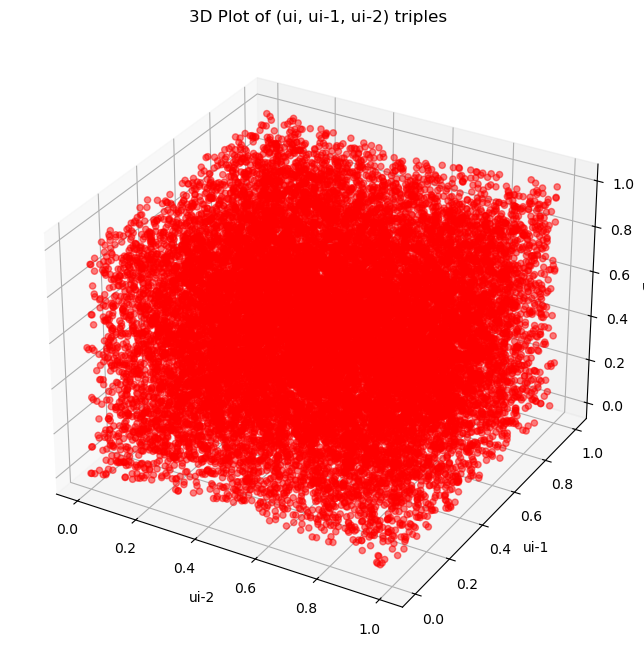

In [1]:
import matplotlib.pyplot as plt

# Le seed ne doit pas avoir une valeur 0, ou encore dépasser sa période qui est de 2**31
def randu(seed, n):
    x = seed
    points = []
    for _ in range(n):
        x = (65539 * x) % (2**31)
        u = x / (2**31)
        points.append(u)
    return points

points = randu(1, 20000)

subset_indices_ui=[]
for i in range(1,len(points)):
    if 0.5 <= points[i] <= 0.51:
        subset_indices_ui.append(i)

subset_ui = [points[i] for i in subset_indices_ui]
subset_ui_minus_1 = [points[i-1] for i in subset_indices_ui]


plt.scatter(subset_ui_minus_1, subset_ui)
plt.xlabel('u_i-1')
plt.ylabel('u_i')

from mpl_toolkits.mplot3d import Axes3D

# Create triples (ui, ui-1, ui-2)
triples = [(points[i], points[i-1], points[i-2]) for i in range(2, len(points))]

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract coordinates
ui_minus_2, ui_minus_1, ui = zip(*triples)

# Plot triples
ax.scatter(ui_minus_2, ui_minus_1, ui, alpha=0.5, c='r', marker='o')

# Set labels
ax.set_xlabel('ui-2')
ax.set_ylabel('ui-1')
ax.set_zlabel('ui')
ax.set_title('3D Plot of (ui, ui-1, ui-2) triples')

plt.show()

# Mauvais résultat... On devrait observer une régularité



# Exercice Laplace and Rejection

## Question 1

In [2]:
import pandas as pd
import numpy as np

# Génération d'un échantillon de n loi uniforme :

n=1000
vecteur_uniforme = np.random.rand(n)

vecteur_uniforme

def transformation_exponentielle(x):
    u = -np.log(1-x)
    return u

vecteur_exponentiel = transformation_exponentielle(vecteur_uniforme)

vecteur_exponentiel

def transformation_laplace(x):
    u = np.where(x <= 0.5,np.log(2*x), -np.log(2*(1-x)))
    return u

vecteur_laplace = transformation_laplace(vecteur_uniforme)

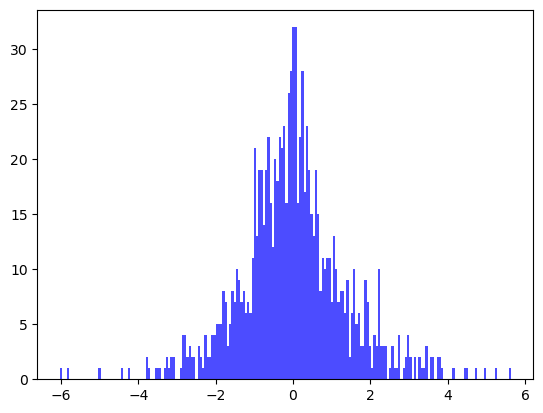

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(vecteur_laplace, bins=200, color='blue', alpha=0.7)
plt.show()

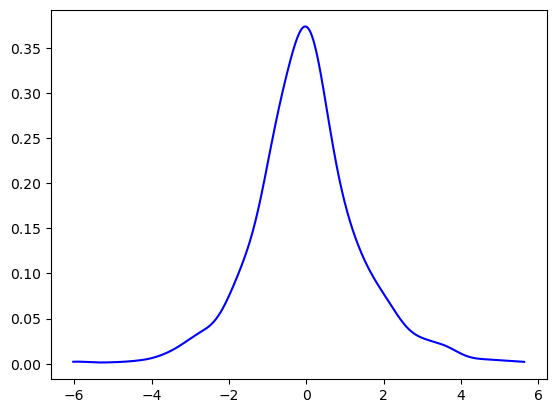

In [8]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(vecteur_laplace)

x_values = np.linspace(min(vecteur_laplace), max(vecteur_laplace), 1000)
y_values = kde(x_values)

plt.plot(x_values, y_values, color='blue', linestyle='-', label='Densité estimée')

plt.show()

## Question 2

In [16]:
# Voir feuille TD papier pour comprendre le début (nottament comment trouver M...)

import pandas as pd
import numpy as np

M = np.sqrt(2/np.pi)*np.exp(0.5)

def densite_laplace(x):
    u = 0.5*np.exp(-abs(x))
    return u

def densite_normale(x):
    u = (1/np.sqrt(2*np.pi))*np.exp(-(x^2)/2)
    return u

def accept_reject(x):
    u = np.random.rand(1)
    while u >= (densite_normale(x))/(M*densite_laplace(x)):
        u = np.random.rand(1)
    return u

accept_reject(vecteur_laplace[0])



TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Exercice Important Sampling

In [20]:
import numpy as np

mu = 0
sigma = 1
d = 2
c = 0.5
n=100

vect_norm = np.random.normal(mu,sigma,size=d)

liste_point = []
point_A = []

for i in range(0,n):
    vect_norm = np.random.normal(mu,sigma, size=d)
    liste_point.append(vect_norm)
    if np.abs(vect_norm[0]*vect_norm[1]) < c:
        point_A.append(vect_norm)

point_A


[array([0.13405962, 1.18827172]),
 array([-0.74928082,  0.58591369]),
 array([-0.27422087, -0.33697741]),
 array([ 1.60434379, -0.22942006]),
 array([ 0.17484351, -0.29107256]),
 array([0.95515097, 0.39690467]),
 array([-0.1748031, -0.2385353]),
 array([-0.19524115,  0.37894034]),
 array([-1.26170314,  0.01622361]),
 array([-0.12146323,  2.47956989]),
 array([-0.08407323, -1.06042394]),
 array([-0.0018768 , -0.84178457]),
 array([-0.76711849, -0.58104453]),
 array([-0.25730448, -1.11385922]),
 array([-0.13944845, -1.50778965]),
 array([-0.59601673,  0.37025267]),
 array([-0.31996357,  0.05496139]),
 array([ 0.26861543, -0.90684997]),
 array([0.86372057, 0.2258749 ]),
 array([ 0.12889033, -0.91018361]),
 array([-0.17802784, -1.00868079]),
 array([ 0.17692053, -0.24479003]),
 array([-0.0980445,  0.5142767]),
 array([ 0.54995948, -0.60135526]),
 array([ 0.37916844, -1.01843313]),
 array([-0.97322815, -0.18984946]),
 array([-0.7344665,  0.0156014]),
 array([-1.03037156,  0.27318981]),
 arr

In [26]:
mean_A = np.mean(point_A,axis=0) # axis = 0 => on somme sur les colonne
mean_A

cov_A = np.cov(point_A,rowvar=False)
cov_A

array([[0.54189264, 0.01937605],
       [0.01937605, 0.51173324]])